In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support


In [3]:
#Reading the dataset voice.csv

data = pd.read_csv("voiceSamples.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
#To check the distribution of male and female across all the attributes

data.groupby("label").count()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
male,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584


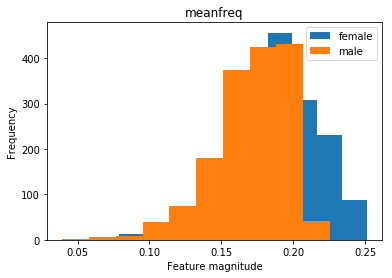

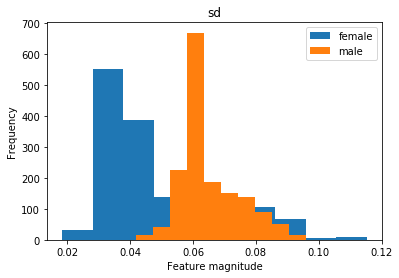

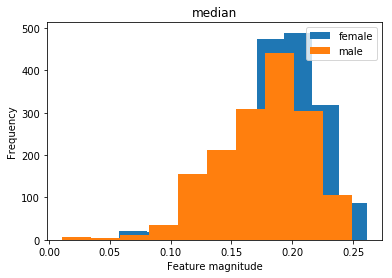

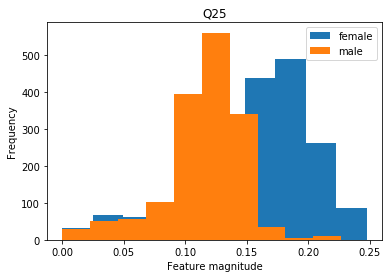

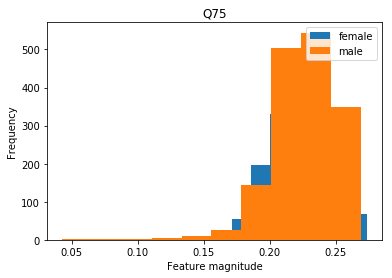

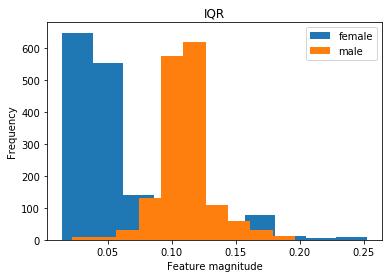

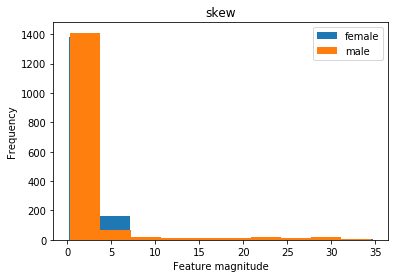

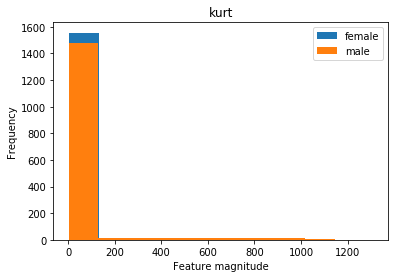

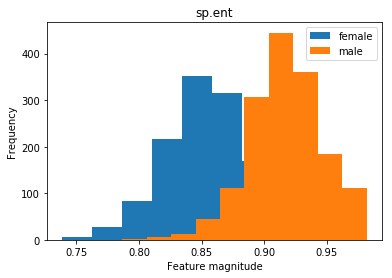

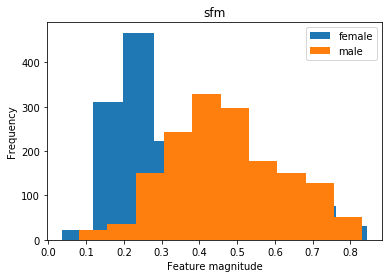

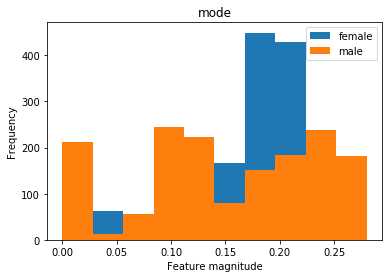

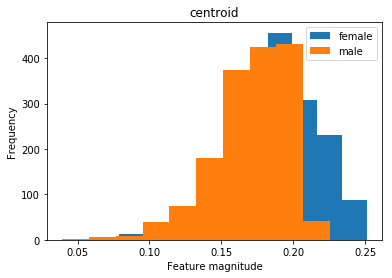

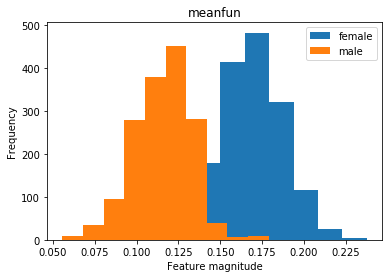

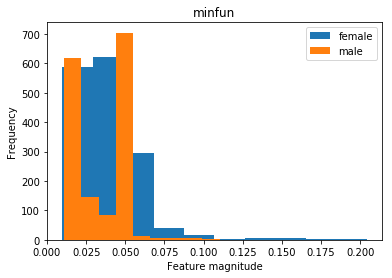

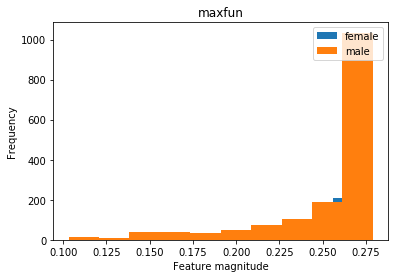

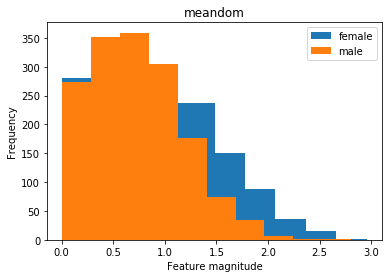

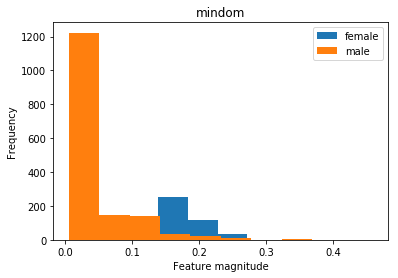

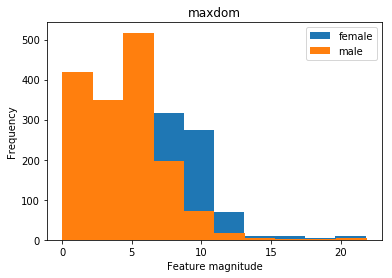

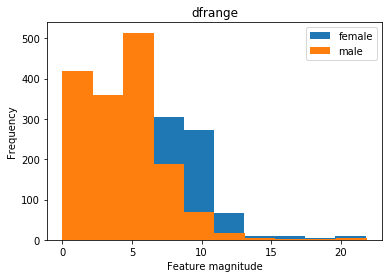

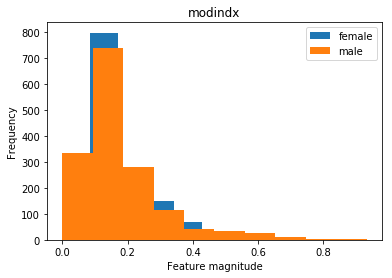

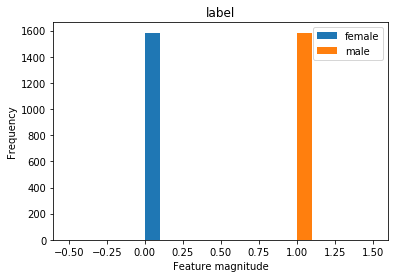

In [10]:
#Check the distribution of male and female in each feature columns



for col in data.columns:
    plt.hist(data.loc[data['label'] == 0, col],label ="female")
    plt.hist(data.loc[data['label'] == 1, col],label="male")
    plt.title(col)
    plt.xlabel("Feature magnitude")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

In [6]:
#Encoding the label column. Female to 0 and male to 1

class_mapping = {label: idx for idx, label in enumerate(np.unique(data['label']))}
class_mapping

{'female': 0, 'male': 1}

In [7]:
# Converting class labels from strings to integers

data['label'] = data['label'].map(class_mapping)


In [8]:
#Creating X,y and splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [13]:
#Scaling the features

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [18]:
#Train logistic regression model

logit = LogisticRegression()
logit.fit(X_train_std, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test_std, y_test)))

y_pred_logit = logit.predict(X_test_std)
print("Predicted value: ",y_pred_logit)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)


Logistic Regression
Accuracy on training set: 0.978
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1

In [19]:
#Train decision tree model


tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train_std, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_std, y_test)))

y_pred_tree = tree.predict(X_test_std)
print("Predicted value: ",y_pred_tree)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Decision Tree
Accuracy on training set: 0.983
Accuracy on test set: 0.961
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1